In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras

In [5]:
from tensorflow.keras.datasets import reuters

In [6]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10_000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


decode it back to words (just for fun)

In [14]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [23]:
decoded_newswire=" ".join([reverse_word_index.get(i-3,"?") for i in train_data[3][:21]])
decoded_newswire

"? the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding"

In [ ]:
vectorize the data

In [47]:
def vectorize_sequences(sequences,dimension=10_000):
  results = np.zeros((len(sequences),dimension))
  for location,sequence in enumerate(sequences):
    for word in sequence:
      results[location,word]=1
  return results


In [49]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [29]:
def to_one_hot(labels,dimension=46):
  results = np.zeros((len(labels),dimension))
  for index,label in enumerate(labels):
    results[index,label]=1
  return results

In [30]:
y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

model definition

In [51]:

model=keras.Sequential([
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(46,activation='softmax')
])

compile

In [52]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

train the model

In [54]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=523,validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4276 - loss: 3.1754 - val_accuracy: 0.6330 - val_loss: 1.7918
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6635 - loss: 1.6317 - val_accuracy: 0.6890 - val_loss: 1.3752
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7309 - loss: 1.2306 - val_accuracy: 0.7320 - val_loss: 1.2010
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7841 - loss: 0.9835 - val_accuracy: 0.7360 - val_loss: 1.1288
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8216 - loss: 0.8038 - val_accuracy: 0.7780 - val_loss: 1.0067
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8579 - loss: 0.6628 - val_accuracy: 0.7880 - val_loss: 0.9620
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8814 - loss: 0.5613 - val_accuracy: 0.8050 - val_loss: 0.9347
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8974 - loss: 0.4858 - val_accuracy: 0.8040 - v

plot

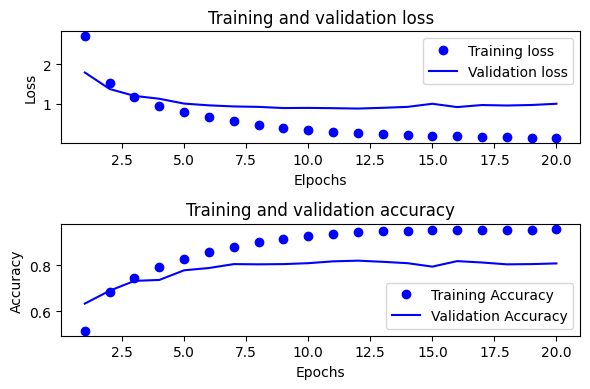

In [58]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

fig=plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
epoch_w_max_accuracy=-float('inf')
acc_scores=history.history['val_accuracy']
for i in range(len(acc_scores)):
  if acc_scores[i]==max(acc_scores):
    epoch_w_max_accuracy=i+1
epoch_w_max_accuracy

12

In [64]:
model2=keras.Sequential([
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(46,activation='softmax')
])

In [65]:
model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [66]:
model2.fit(x_train,y_train,epochs=epoch_w_max_accuracy,batch_size=512)

Epoch 1/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2727 - loss: 3.3728
Epoch 2/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6351 - loss: 1.7456
Epoch 3/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7273 - loss: 1.2637
Epoch 4/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7986 - loss: 0.9774
Epoch 5/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8307 - loss: 0.8073
Epoch 6/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8550 - loss: 0.6736
Epoch 7/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8748 - loss: 0.5767
Epoch 8/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9025 - loss: 0.4767
Epoch 9/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9155 - loss: 0.4021
Epoch 10/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9273 - loss: 0.3306
Epoch 11/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9341 - loss: 0.2979
Epoch 12/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy:

In [68]:
results=model2.evaluate(x_test,y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8084 - loss: 0.8738


In [70]:
results

[0.906304121017456, 0.7996438145637512]

In [71]:
predictions=model2.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [81]:
for i in predictions[:6]:
    print('i max->',np.argmax(i))

i max-> 3
i max-> 10
i max-> 1
i max-> 4
i max-> 13
i max-> 3


In [82]:
joblib.dump(model2,'model.pkl')

['model.pkl']

a model with an information bottleneck